## Loading dataset from Kaggle

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.vision.image import *

In [2]:
!pip install kaggle

In [3]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [4]:
import getpass
print("Paste the content from kaggle.json, then press Enter:")
tokenString = getpass.getpass()
with open('/content/.kaggle/kaggle.json', 'w') as file:
  file.write(tokenString)

Paste the content from kaggle.json, then press Enter:
··········


In [5]:
!mkdir /root/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [7]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign -p /content/skin-cancer-data

 96% 313M/325M [00:03<00:00, 106MB/s]
100% 325M/325M [00:03<00:00, 90.2MB/s]


In [10]:
!cd skin-cancer-data; unzip *.zip

Archive:  skin-cancer-malignant-vs-benign.zip
  inflating: data/test/benign/1.jpg  
  inflating: data/test/benign/10.jpg  
  inflating: data/test/benign/1003.jpg  
  inflating: data/test/benign/1006.jpg  
  inflating: data/test/benign/1013.jpg  
  inflating: data/test/benign/1018.jpg  
  inflating: data/test/benign/1019.jpg  
  inflating: data/test/benign/1023.jpg  
  inflating: data/test/benign/1025.jpg  
  inflating: data/test/benign/1029.jpg  
  inflating: data/test/benign/1033.jpg  
  inflating: data/test/benign/1034.jpg  
  inflating: data/test/benign/1042.jpg  
  inflating: data/test/benign/1044.jpg  
  inflating: data/test/benign/105.jpg  
  inflating: data/test/benign/1055.jpg  
  inflating: data/test/benign/1061.jpg  
  inflating: data/test/benign/1070.jpg  
  inflating: data/test/benign/1074.jpg  
  inflating: data/test/benign/1077.jpg  
  inflating: data/test/benign/1080.jpg  
  inflating: data/test/benign/1087.jpg  
  inflating: data/test/benign/1088.jpg  
  inflating: data

## Data augmentation

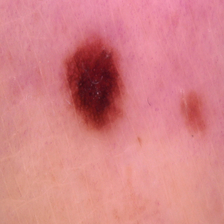

In [11]:
im=open_image('/content/skin-cancer-data/data/train/benign/637.jpg')
im

In [0]:
#tfms = get_transforms(max_rotate=180)
# The possible transformations are vertical and horizontal flips and 90-degree rotations.
tfms = get_transforms(do_flip=True, flip_vert=True)
def get_ex(): return im
""
def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

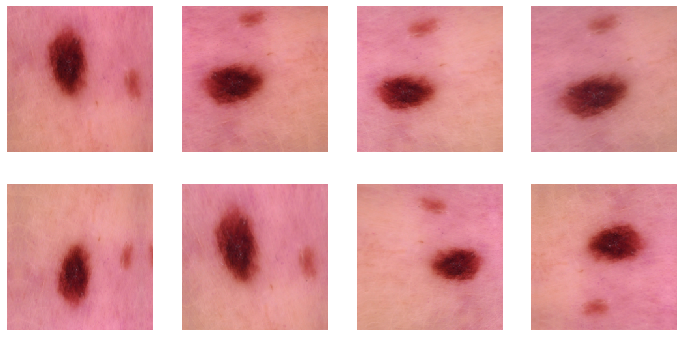

In [13]:
plots_f(2, 4, 12, 6, size=224)

## Defining the DataBunch object

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [0]:
!ls -l /content/skin-cancer-data/data/test/benign | wc -l;
!ls -l /content/skin-cancer-data/data/test/malignant | wc -l;
!ls -l /content/skin-cancer-data/data/train/benign | wc -l;
!ls -l /content/skin-cancer-data/data/train/malignant | wc -l;

361
301
1441
1198


In [0]:
!ls -l /content/skin-cancer-data/test/benign | wc -l;
!ls -l /content/skin-cancer-data/test/malignant | wc -l;
!ls -l /content/skin-cancer-data/train/benign | wc -l;
!ls -l /content/skin-cancer-data/train/malignant | wc -l;

361
301
1441
1198


In [0]:
!ls /content/skin-cancer-data

data  skin-cancer-malignant-vs-benign.zip  test  train


In [0]:
!rm -r /content/skin-cancer-data/data;

In [0]:
!rm -r /content/skin-cancer-data/skin-cancer-malignant-vs-benign.zip

In [0]:
#data = ImageDataBunch.from_folder("/content/skin-cancer-data", ds_tfms=tfms)
path = Path('/content/skin-cancer-data/train').resolve()
data = (ImageList.from_folder(path)
        .split_by_rand_pct(valid_pct=0.2, seed=10)
        .label_from_folder()
        .transform(tfms)
        .databunch()
        .normalize())

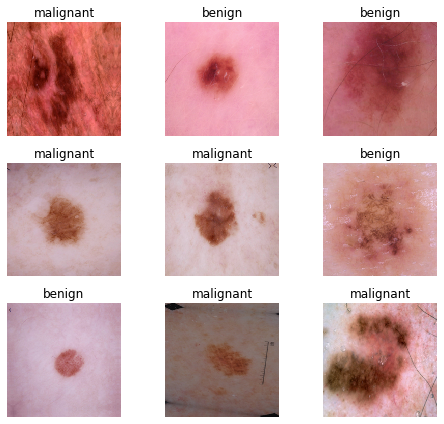

In [19]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)

['benign', 'malignant']


In [0]:
data

ImageDataBunch;

Train: LabelList (2110 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
malignant,malignant,malignant,malignant,malignant
Path: /content/skin-cancer-data/train;

Valid: LabelList (527 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
malignant,benign,malignant,malignant,benign
Path: /content/skin-cancer-data/train;

Test: None

## Training: ResNet34

In [0]:
learn = cnn_learner(data, models.resnet34, pretrained=True, metrics=[accuracy], model_dir='/content/models')

In [0]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


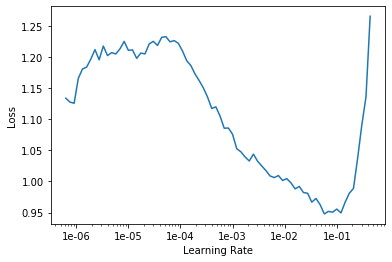

In [0]:
learn.lr_find()
learn.recorder.plot()


In [0]:
# This callback is necessary to record training loss with Dropout layers disabled.
# By default, when fit_one_cycle() records train_loss and accuracy, it is with Dropout enabled.
# This leads to misleading data when comparing to validation loss.
# This callback also:
# * saves model weights after each epoch
# * stores the epoch with the best validation accuracy.
class LossRecorderCB(Callback):
  def __init__(self):
    # Record [loss, accuracy] for train set
    self.record_train = {}
    # Record [loss, accuracy] for valid set
    self.record_valid = {}
    self.epoch = 1
    self.best_valid_acc = 0
    self.best_weights_epoch = -1

  def on_epoch_end(self, **kwargs):
    # We don't need to call learn.validate() on the validation set because it is already calculated correctly.
    self.record_valid[self.epoch] = kwargs['last_metrics']
    self.record_train[self.epoch] = learn.validate(data.train_dl)
    # Save weights as [epoch#].pth
    weights_path = learn.save(str(self.epoch), return_path=True)
    # If current validation accuracy is higher, update self.best_weights_epoch.
    cur_valid_acc = self.record_valid[self.epoch][1].item()
    if cur_valid_acc > self.best_valid_acc:
      self.best_valid_acc = cur_valid_acc
      self.best_weights_epoch = self.epoch

    self.epoch += 1


In [0]:
LRCB = LossRecorderCB()

In [29]:
learn.fit_one_cycle(1, max_lr=slice(1e-5,1e-3), callbacks=[LRCB])

epoch,train_loss,valid_loss,accuracy,time
0,0.790337,0.531459,0.800759,00:24


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


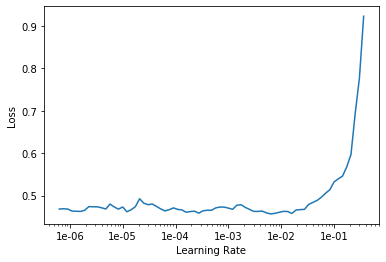

In [0]:
learn.lr_find()
learn.recorder.plot()


In [0]:
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-3), callbacks=[LRCB])

epoch,train_loss,valid_loss,accuracy,time
0,0.484268,0.376378,0.844402,00:22
1,0.494838,0.375938,0.833017,00:22
2,0.468851,0.399025,0.844402,00:22
3,0.453375,0.393932,0.819734,00:22
4,0.443403,0.385597,0.821632,00:22
5,0.414721,0.349836,0.833017,00:22
6,0.377327,0.340800,0.853890,00:23
7,0.367569,0.330394,0.855787,00:22
8,0.360573,0.333549,0.857685,00:23
9,0.337600,0.333531,0.857685,00:23


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


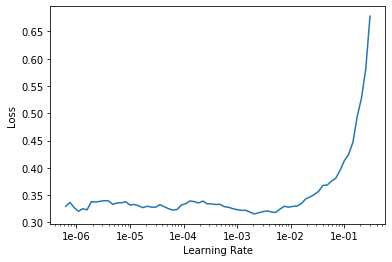

In [0]:
learn.lr_find()
learn.recorder.plot()


In [0]:
learn.fit_one_cycle(6, max_lr=slice(1e-5,1e-3), callbacks=[LRCB])

epoch,train_loss,valid_loss,accuracy,time
0,0.325583,0.332095,0.846300,00:22
1,0.328564,0.336155,0.855787,00:22
2,0.320495,0.331412,0.861480,00:22
3,0.316918,0.330467,0.867173,00:22
4,0.307165,0.323491,0.869070,00:23
5,0.297213,0.321302,0.863378,00:22


In [0]:
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-3), callbacks=[LRCB])

epoch,train_loss,valid_loss,accuracy,time
0,0.293203,0.322511,0.861480,00:22
1,0.303339,0.324678,0.869070,00:22
2,0.304000,0.314464,0.870968,00:22
3,0.302906,0.330159,0.848197,00:22
4,0.295863,0.309023,0.867173,00:22
5,0.284479,0.302686,0.867173,00:22
6,0.278839,0.312490,0.861480,00:22
7,0.263588,0.302482,0.880455,00:22
8,0.263637,0.299344,0.872865,00:23
9,0.254795,0.303796,0.870968,00:22


In [0]:
!ls /content/models

10.pth	14.pth	18.pth	21.pth	25.pth	29.pth	4.pth  8.pth
11.pth	15.pth	19.pth	22.pth	26.pth	2.pth	5.pth  9.pth
12.pth	16.pth	1.pth	23.pth	27.pth	30.pth	6.pth  tmp.pth
13.pth	17.pth	20.pth	24.pth	28.pth	3.pth	7.pth  trained_model.pth


In [0]:
print(LRCB.best_weights_epoch)
print(LRCB.best_valid_acc)

28
0.8804554343223572


In [0]:
print(LRCB.record_train)
print(LRCB.record_valid)

{1: [0.48551214, tensor(0.8242)], 2: [0.38225782, tensor(0.8462)], 3: [0.3425749, tensor(0.8584)], 4: [0.32812878, tensor(0.8618)], 5: [0.30928135, tensor(0.8716)], 6: [0.30034214, tensor(0.8643)], 7: [0.284726, tensor(0.8706)], 8: [0.27541193, tensor(0.8823)], 9: [0.26626343, tensor(0.8838)], 10: [0.26132178, tensor(0.8804)], 11: [0.2426073, tensor(0.8901)], 12: [0.23604141, tensor(0.8960)], 13: [0.22639906, tensor(0.9028)], 14: [0.23332435, tensor(0.9009)], 15: [0.23359919, tensor(0.8979)], 16: [0.22928196, tensor(0.8945)], 17: [0.23822212, tensor(0.8965)], 18: [0.2192801, tensor(0.9062)], 19: [0.21469295, tensor(0.9092)], 20: [0.21963203, tensor(0.9009)], 21: [0.22271362, tensor(0.8989)], 22: [0.20631067, tensor(0.9116)], 23: [0.22388685, tensor(0.9019)], 24: [0.23303235, tensor(0.8975)], 25: [0.21589197, tensor(0.9087)], 26: [0.20429608, tensor(0.9131)], 27: [0.2044913, tensor(0.9194)], 28: [0.20304336, tensor(0.9111)], 29: [0.19377133, tensor(0.9170)], 30: [0.19519126, tensor(0.92

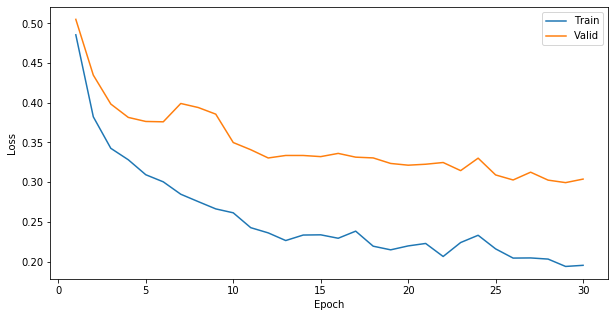

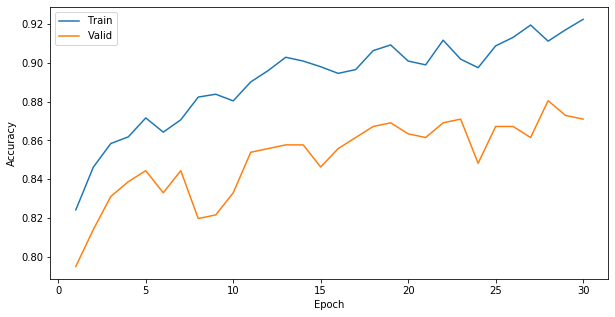

In [0]:
# Input: record_train or record_valid object
# Output: dictionary with keys: epochList, lossList, accList
def unpackRecord(rec):
  ret = {}
  ret['epochList'] = []
  ret['lossList'] = []
  ret['accList'] = []
  for k, v in rec.items():
    ret['epochList'].append(k)
    ret['lossList'].append(v[0])
    ret['accList'].append(v[1].item())
  return ret

def plotLRCB(LRCB):
  trainDict = unpackRecord(LRCB.record_train)
  validDict = unpackRecord(LRCB.record_valid)
  figsize = (10, 5)

  fig, ax1 = plt.subplots(1, 1, figsize=figsize)
  ax1.plot(trainDict['epochList'], trainDict['lossList'], label='Train')
  ax1.plot(validDict['epochList'], validDict['lossList'], label='Valid')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss')
  ax1.legend()

  fig, ax2 = plt.subplots(1, 1, figsize=figsize)
  ax2.plot(trainDict['epochList'], trainDict['accList'], label='Train')
  ax2.plot(validDict['epochList'], validDict['accList'], label='Valid')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()

plotLRCB(LRCB)

AttributeError: ignored

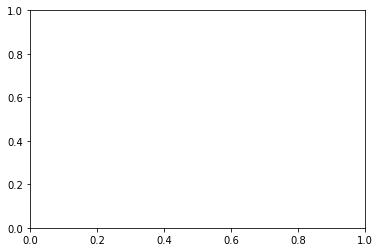

In [0]:
# This plot shows training loss as higher than validation loss.
# The reason is that Dropout is enabled during training.
# Also, it plots the moving average of the losses during training, so it has some traces of using bad weights near the beginning.
learn.recorder.plot_losses()

## Unfreezing, fine-tuning, and learning rates

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


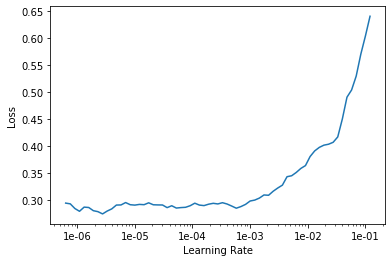

In [0]:
learn.load('stage-1')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4), callbacks=[LRCB])

epoch,train_loss,valid_loss,accuracy,time
0,0.288445,0.321338,0.859583,00:16
1,0.282339,0.317497,0.857685,00:16
2,0.288431,0.308686,0.863378,00:16
3,0.278051,0.299204,0.870968,00:16
4,0.270242,0.297246,0.863378,00:16
5,0.255760,0.291465,0.869070,00:16
6,0.248912,0.292057,0.872865,00:16
7,0.239206,0.289039,0.867173,00:16
8,0.239661,0.288133,0.869070,00:16
9,0.239058,0.285568,0.874763,00:16


In [0]:
learn.save('stage-2');
print(LRCB.record_train)
print(LRCB.record_valid)

{1: [0.5407963, tensor(0.8271)], 2: [0.39008862, tensor(0.8447)], 3: [0.36364925, tensor(0.8555)], 4: [0.31033522, tensor(0.8633)], 5: [0.28637302, tensor(0.8643)], 6: [0.27203563, tensor(0.8809)], 7: [0.25431168, tensor(0.8877)], 8: [0.24043602, tensor(0.8989)], 9: [0.24886073, tensor(0.8960)], 10: [0.23619987, tensor(0.8994)], 11: [0.24602625, tensor(0.8862)], 12: [0.22702232, tensor(0.9038)], 13: [0.2172948, tensor(0.8999)], 14: [0.21106264, tensor(0.9155)], 15: [0.19775999, tensor(0.9180)], 16: [0.19866984, tensor(0.9150)], 17: [0.19235152, tensor(0.9146)], 18: [0.19784708, tensor(0.9175)], 19: [0.20171005, tensor(0.9185)], 20: [0.18899406, tensor(0.9185)]}
{1: [0.62188655, tensor(0.7970)], 2: [0.49285552, tensor(0.8178)], 3: [0.4469061, tensor(0.8197)], 4: [0.4038163, tensor(0.8159)], 5: [0.36322108, tensor(0.8444)], 6: [0.34218395, tensor(0.8330)], 7: [0.32992765, tensor(0.8406)], 8: [0.32881272, tensor(0.8501)], 9: [0.32474357, tensor(0.8577)], 10: [0.32361677, tensor(0.8539)], 

In [0]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4), callbacks=[LRCB])

epoch,train_loss,valid_loss,accuracy,time
0,0.229825,0.288524,0.863378,00:16
1,0.234436,0.282715,0.869070,00:16
2,0.231005,0.284470,0.870968,00:16
3,0.234090,0.284598,0.870968,00:16
4,0.225876,0.282551,0.874763,00:16
5,0.213875,0.282507,0.870968,00:16
6,0.207579,0.282932,0.867173,00:16
7,0.198670,0.281912,0.869070,00:16
8,0.196813,0.280976,0.865275,00:16
9,0.195063,0.280167,0.865275,00:16


In [0]:
learn.save('stage-2');
print(LRCB.record_train)
print(LRCB.record_valid)

{1: [0.5407963, tensor(0.8271)], 2: [0.39008862, tensor(0.8447)], 3: [0.36364925, tensor(0.8555)], 4: [0.31033522, tensor(0.8633)], 5: [0.28637302, tensor(0.8643)], 6: [0.27203563, tensor(0.8809)], 7: [0.25431168, tensor(0.8877)], 8: [0.24043602, tensor(0.8989)], 9: [0.24886073, tensor(0.8960)], 10: [0.23619987, tensor(0.8994)], 11: [0.24602625, tensor(0.8862)], 12: [0.22702232, tensor(0.9038)], 13: [0.2172948, tensor(0.8999)], 14: [0.21106264, tensor(0.9155)], 15: [0.19775999, tensor(0.9180)], 16: [0.19866984, tensor(0.9150)], 17: [0.19235152, tensor(0.9146)], 18: [0.19784708, tensor(0.9175)], 19: [0.20171005, tensor(0.9185)], 20: [0.18899406, tensor(0.9185)], 21: [0.19185686, tensor(0.9219)], 22: [0.18099245, tensor(0.9287)], 23: [0.1802635, tensor(0.9307)], 24: [0.17641897, tensor(0.9268)], 25: [0.17312074, tensor(0.9312)], 26: [0.16303408, tensor(0.9292)], 27: [0.16251168, tensor(0.9370)], 28: [0.14576922, tensor(0.9429)], 29: [0.14969616, tensor(0.9429)], 30: [0.14867398, tensor(0

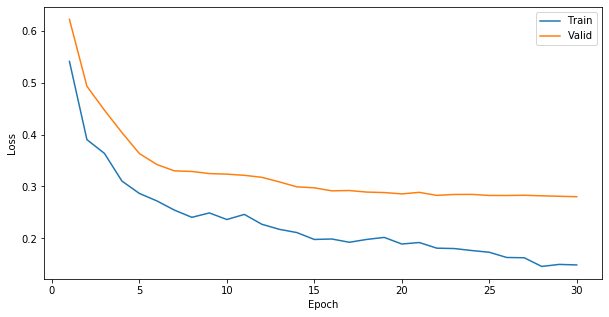

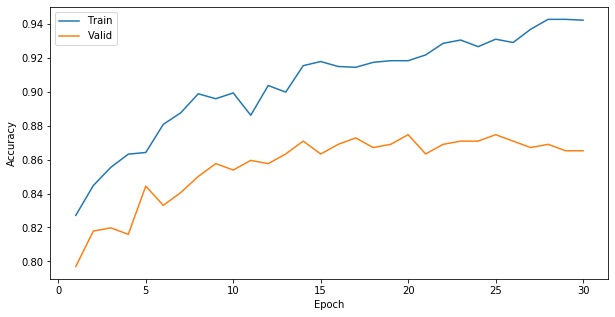

In [0]:
plotLRCB(LRCB)

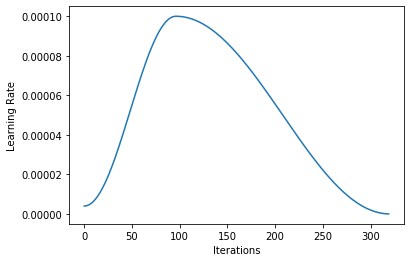

In [0]:
learn.recorder.plot_lr()

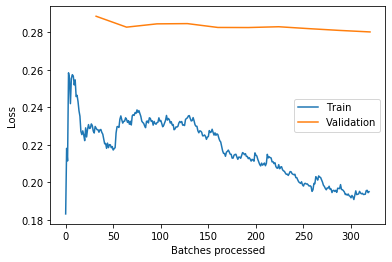

In [0]:
learn.recorder.plot_losses()

## Misclassified examples

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

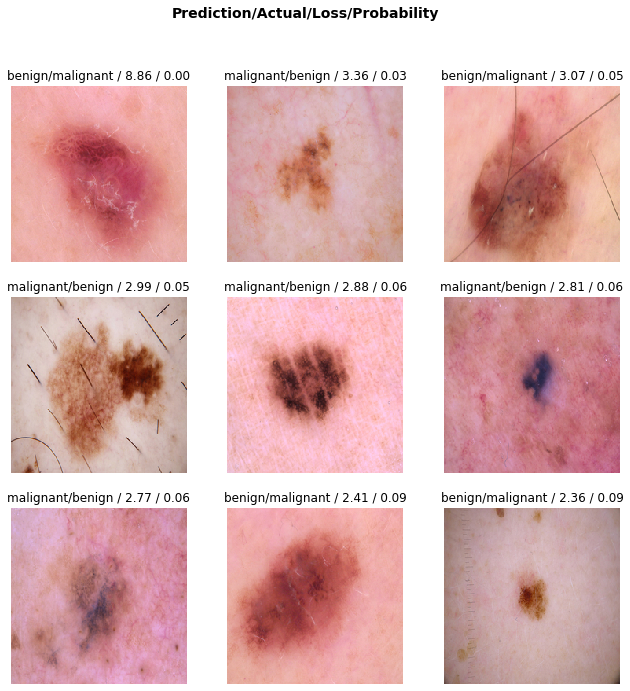

In [0]:
interp.plot_top_losses(9, figsize=(11,11))


## Evaluating test error

In [30]:
path = Path('/content/skin-cancer-data').resolve()
test_metrics = [
  accuracy,
  Precision(average='binary', pos_label=1),
  Recall(average='binary', pos_label=1)
  ]
data_test = (ImageList.from_folder(path)
  .split_by_folder(train='test', valid='test')
  .label_from_folder()
  .databunch()
  .normalize()) 
# Return [loss, accuracy, precision, recall] for test set
learn.validate(data_test.valid_dl, metrics=test_metrics)

[0.52213854, tensor(0.8136), tensor(0.8041), tensor(0.7800)]

In [0]:
# Save weights to google drive.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_path = '/content/gdrive/My Drive/CECS456-models/'

In [0]:
!cp -R /content/models "{root_path}"

In [26]:
# checking category "malignant"
category = learn.data.train_ds[0][1]
int(category)

1